In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_raw = pd.read_csv('Master Table.csv')
print("Ukuran awal data:", df_raw.shape)
df_raw.head(3)

Ukuran awal data: (10050, 51)


,employee_id,year,rating,fullname,grade_id,grade_name,education_id,education_level,years_of_service,iq,...,pillar_gdr,pillar_cex,pillar_ids,pillar_qdd,pillar_sto,pillar_sea,pillar_vcu,pillar_lie,pillar_ftc,pillar_csi
0,EMP100889,2025,NaN,Dwi Baskara Rohman,1,III,3,S2,6.166667,102.0,...,4.0,3.0,3.0,3.0,NaN,3.0,2.0,2.0,3.0,4.0
1,EMP100792,2025,NaN,Budi Yudhistira Pratama,1,III,4,SMA,1.250000,117.0,...,99.0,NaN,4.0,5.0,5.0,NaN,5.0,NaN,4.0,5.0
2,EMP101730,2025,NaN,Indra Salsabila,2,IV,4,SMA,3.166667,115.0,...,3.0,3.0,4.0,4.0,3.0,3.0,4.0,2.0,4.0,2.0


In [ ]:
df = df_raw.copy()

# Satu baris idealnya = 1 karyawan di tahun t (employee_id + year)
# Pastikan kolom minimal ada
required_cols = ["employee_id", "year", "rating"]
missing = [c for c in required_cols if c not in df.columns]
assert len(missing) == 0, f"Kolom wajib hilang: {missing}"

# --- INFO AWAL ---
print("\n== INFO DATA ==")
print(df.info())
print("\n== MISSING VALUES ==")
print(df.isna().sum().sort_values(ascending=False).head(20))

# --- CEK DUPLIKAT employee_id + year ---
dup_count = df.duplicated(subset=["employee_id","year"]).sum()
print(f"\nDuplikat (employee_id, year): {dup_count}")

# --- Normalisasi tipe ---
# Anggap kolom numerik utama ini mungkin ada di data:
maybe_numeric = ["rating","iq","gtq","tiki","pauli","faxtor","years_of_service","years_of_service_months"]
for col in maybe_numeric:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Ubah years_of_service jika hanya tersedia dalam bulan
if "years_of_service" not in df.columns and "years_of_service_months" in df.columns:
    df["years_of_service"] = df["years_of_service_months"] / 12.0

# Normalisasi kategori huruf besar (MBTI/DISC)
for col in ["mbti","disc","disc_word","grade_name","education_level"]:
    if col in df.columns and df[col].dtype == "object":
        df[col] = df[col].str.strip().str.upper()

# Imputasi numerik dengan median per grade (jika ada), else median global
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if "grade_name" in df.columns:
    df[num_cols] = df.groupby("grade_name")[num_cols].transform(lambda s: s.fillna(s.median()))
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Kategori: isi NA dengan "UNKNOWN"
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
df[cat_cols] = df[cat_cols].fillna("UNKNOWN")

print("\n== RINGKASAN DESKRIPTIF ==")
display(df.describe().T)


== INFO DATA ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   employee_id       10050 non-null  object 
 1   year              10050 non-null  int64  
 2   rating            8942 non-null   float64
 3   fullname          10050 non-null  object 
 4   grade_id          10050 non-null  int64  
 5   grade_name        10050 non-null  object 
 6   education_id      10050 non-null  int64  
 7   education_level   10050 non-null  object 
 8   years_of_service  10050 non-null  float64
 9   iq                7770 non-null   float64
 10  gtq               8390 non-null   float64
 11  tiki              10050 non-null  int64  
 12  disc              9195 non-null   object 
 13  mbti              9305 non-null   object 
 14  pauli             10050 non-null  int64  
 15  faxtor            10050 non-null  int64  
 16  papi_n            9270 

,count,mean,std,min,25%,50%,75%,max
year,10050.0,2023.000000,1.414284,2021.0,2022.000000,2023.000000,2024.0,2025.000000
rating,10050.0,3.193333,2.724913,0.0,3.000000,3.000000,4.0,99.000000
grade_id,10050.0,1.997512,0.818663,1.0,1.000000,2.000000,3.0,3.000000
education_id,10050.0,2.464677,1.106794,1.0,1.000000,2.000000,3.0,4.000000
years_of_service,10050.0,4.177032,2.098047,0.0,2.666667,4.166667,5.5,12.416667
iq,10050.0,109.407463,15.747777,80.0,98.000000,108.000000,120.0,140.000000
gtq,10050.0,27.444279,5.746159,9.0,24.000000,27.000000,31.0,46.000000
tiki,10050.0,5.481095,2.894278,1.0,3.000000,6.000000,8.0,10.000000
pauli,10050.0,59.974129,23.424021,20.0,39.000000,60.000000,80.0,100.000000
faxtor,10050.0,60.283085,22.928236,20.0,41.000000,62.000000,80.0,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   employee_id       10050 non-null  object 
 1   year              10050 non-null  int64  
 2   rating            10050 non-null  float64
 3   fullname          10050 non-null  object 
 4   grade_id          10050 non-null  int64  
 5   grade_name        10050 non-null  object 
 6   education_id      10050 non-null  int64  
 7   education_level   10050 non-null  object 
 8   years_of_service  10050 non-null  float64
 9   iq                10050 non-null  float64
 10  gtq               10050 non-null  float64
 11  tiki              10050 non-null  int64  
 12  disc              10050 non-null  object 
 13  mbti              10050 non-null  object 
 14  pauli             10050 non-null  int64  
 15  faxtor            10050 non-null  int64  
 16  papi_n            10050 non-null  float6

In [12]:
df.to_csv('no_null_master_table.csv', index=False)

In [ ]:
# Deteksi apakah data masih long (ada pillar_code & score)
if {"pillar_code", "score"}.issubset(df.columns):
    # Ambil rata-rata skor pilar per employee_id + year
    pivot = (df.pivot_table(index=["employee_id","year"],
                            columns="pillar_code",
                            values="score",
                            aggfunc="mean")
               .add_prefix("pillar_")
               .reset_index())
    # Merge ke df unik (satu baris/employee-year)
    keep_cols = [c for c in df.columns if c not in ["pillar_code","pillar_label","score"]]
    df_base = df[keep_cols].drop_duplicates(subset=["employee_id","year"])
    df = df_base.merge(pivot, on=["employee_id","year"], how="left")
    print("Selesai pivot pilar. Kolom pilar:", [c for c in df.columns if c.startswith("pillar_")])
else:
    print("Data sudah wide untuk pilar (kolom mulai dengan 'pillar_').")

Data sudah wide untuk pilar (kolom mulai dengan 'pillar_').


# Distribusi Rating


== DISTRIBUSI RATING ==
rating
0.0       15
1.0      672
2.0     1578
3.0     4447
4.0     2437
5.0      881
6.0       13
99.0       7
Name: count, dtype: int64

Proporsi rating:
rating
0.0     0.001493
1.0     0.066866
2.0     0.157015
3.0     0.442488
4.0     0.242488
5.0     0.087662
6.0     0.001294
99.0    0.000697
Name: count, dtype: float64


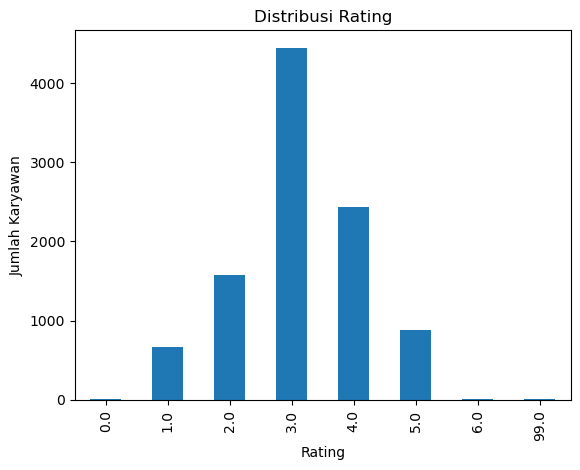

In [ ]:
df["is_hp"] = (df["rating"] == 5).astype(int)

# Distribusi rating
rating_counts = df["rating"].value_counts().sort_index()
rating_share = rating_counts / rating_counts.sum()

print("\n== DISTRIBUSI RATING ==")
print(rating_counts)
print("\nProporsi rating:")
print(rating_share)

# Plot
plt.figure()
rating_counts.plot(kind="bar")
plt.title("Distribusi Rating")
plt.xlabel("Rating")
plt.ylabel("Jumlah Karyawan")
plt.show()

- Grafik ini menunjukkan distribusi rating yang diterima oleh karyawan, dengan analisis dibawah:

1. Rating 3 (rata-rata) adalah rating yang paling dominan, dengan jumlah karyawan yang menerima rating ini mencapai lebih dari 4.000 karyawan. Ini menunjukkan bahwa sebagian besar karyawan menerima penilaian yang berada di tengah rentang penilaian, yang mungkin mencerminkan kinerja rata-rata.

2. Rating 4 juga memiliki jumlah yang cukup besar, lebih dari 2.000 karyawan, yang menandakan bahwa banyak karyawan yang dinilai baik dalam hal kinerja, tetapi tidak cukup mencapai rating tertinggi.

3. Rating 5 (high performer) tampaknya sedikit lebih jarang, dengan hanya 881 karyawan yang menerima rating ini. Hal ini menunjukkan bahwa high performers merupakan segmen kecil dari seluruh karyawan.

4. Rating 0 dan Rating 6 sangat jarang, dengan hanya 15 dan 13 karyawan yang menerima rating tersebut. Ini menunjukkan bahwa nilai ekstrim (sangat rendah atau sangat tinggi) sangat jarang terjadi.

5. Rating 99 menunjukkan adanya kemungkinan data yang hilang atau input yang tidak valid, mengingat jumlahnya sangat kecil.

#### Insight

- Dengan hanya 881 karyawan yang mendapatkan rating 5, ada peluang besar untuk mendalami faktor yang membedakan high performers dari yang lainnya.
- Meningkatkan jumlah high performers bisa menjadi salah satu tujuan perusahaan, dengan mengidentifikasi kompetensi atau kualitas yang mendukung karyawan untuk mencapai rating tinggi.

# Korelasi Variabel dengan Rating

C:\Users\fajar\AppData\Local\Temp\ipykernel_13960\64657278.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


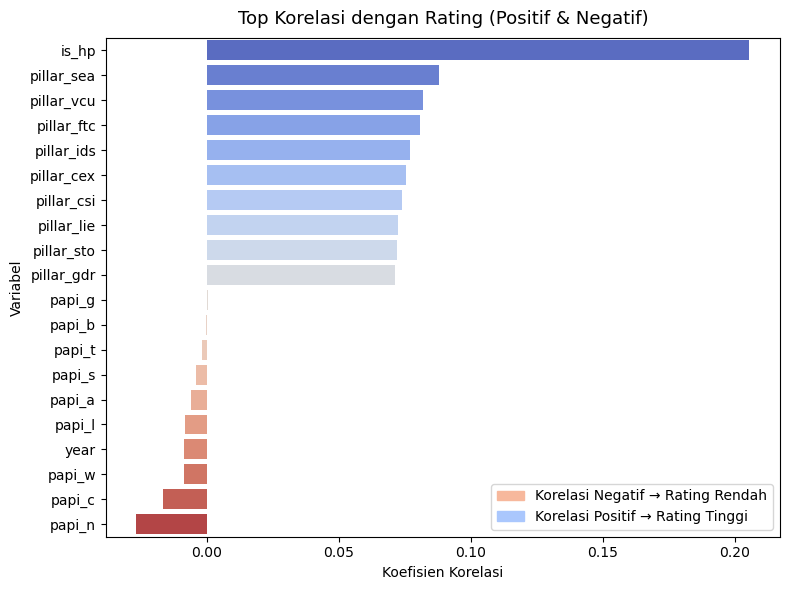

In [ ]:
import matplotlib.patches as mpatches

# Hitung korelasi antar numerik
corr = df.select_dtypes(include=[np.number]).corr()

# Ambil hanya kolom 'rating' untuk melihat pengaruh setiap variabel
corr_rating = corr["rating"].drop("rating").sort_values(ascending=False)

# Ambil 10 korelasi positif & 10 negatif terkuat
top_corr = pd.concat([corr_rating.head(10), corr_rating.tail(10)])

# Plot horizontal bar
plt.figure(figsize=(8,6))
sns.barplot(
    x=top_corr.values,
    y=top_corr.index,
    palette="coolwarm"
)

# Tambahkan title dan label sumbu
plt.title("Top Korelasi dengan Rating (Positif & Negatif)", fontsize=13, pad=10)
plt.xlabel("Koefisien Korelasi")
plt.ylabel("Variabel")

# Tambahkan legend
blue_patch = mpatches.Patch(color=sns.color_palette("coolwarm", 2)[0], label="Korelasi Positif → Rating Tinggi")
red_patch = mpatches.Patch(color=sns.color_palette("coolwarm", 2)[-1], label="Korelasi Negatif → Rating Rendah")
plt.legend(handles=[red_patch, blue_patch], loc="lower right", frameon=True)

plt.tight_layout()
plt.show()

Grafik ini menggambarkan koefisien korelasi antara berbagai variabel dengan rating (performa karyawan). Grafik ini dibagi menjadi dua bagian: korelasi positif dengan rating tinggi (HP) dan korelasi negatif dengan rating rendah (Non-HP).

- Korelasi Positif dengan Rating Tinggi (HP):

is_hp memiliki korelasi positif yang sangat tinggi dengan rating, yang menunjukkan bahwa variabel ini menjadi indikator utama dalam membedakan high performers dari non-high performers.

Pilar pillar_sea (Social Empathy & Awareness), pillar_vcu (Value Creation for Users), dan pillar_ftc (Forward Thinking & Clarity) juga memiliki korelasi positif yang signifikan. Ini berarti bahwa karyawan dengan skor tinggi pada pilar-pilar ini cenderung memiliki rating tinggi.

pillar_ids (Insight & Decision Sharpness), pillar_cex (Curiosity & Experimentation), dan pillar_csi (Commercial Savvy & Impact) juga menunjukkan korelasi positif dengan rating tinggi, yang menunjukkan bahwa kemampuan untuk membuat keputusan cepat dan eksperimen kreatif sangat dihargai dalam karyawan dengan performa tinggi.

- Korelasi Negatif dengan Rating Tinggi (Non-HP):

PAPI-N (Need for Achievement) memiliki korelasi negatif yang cukup signifikan dengan rating, yang berarti bahwa low performers cenderung memiliki skor rendah pada dimensi ini.

Variabel lain yang memiliki korelasi negatif dengan rating tinggi antara lain papi_w, papi_c, dan papi_a. Ini menunjukkan bahwa dimensi seperti Conformity (papi_c), Workdrive (papi_w), dan Adaptability (papi_a) mungkin tidak mendukung performa tinggi, dan lebih berkaitan dengan low performers.

#### Insight

- Korelasi Positif (HP):

Pilar SEA (Social Empathy & Awareness), VCU, dan FTC sangat berpengaruh terhadap kinerja tinggi. Ini menunjukkan bahwa karyawan yang memiliki empati sosial, kreatif dalam menciptakan nilai, dan memiliki pemikiran strategis lebih mungkin menjadi high performers.

Pilar-pilar kompetensi seperti LIE (Lead, Inspire, Empower) dan QDD (Quality Delivery Discipline) juga berkontribusi terhadap kinerja tinggi. Perusahaan sebaiknya lebih memfokuskan pelatihan dan pengembangan pada kompetensi kepemimpinan dan disiplin kerja.

- Korelasi Negatif (Non-HP):

PAPI-N (Need for Achievement) menunjukkan bahwa low performers cenderung kurang memiliki motivasi untuk pencapaian. Ini bisa menjadi indikasi bahwa motivasi intrinsik karyawan sangat penting untuk mencapai kinerja tinggi.

PAPI-C (Conformity) juga menunjukkan bahwa low performers lebih cenderung memiliki penurunan dalam ketaatan terhadap norma dan aturan. Dalam hal ini, tingkat kepatuhan terhadap prosedur dan kemampuan adaptasi terhadap aturan bisa menjadi tantangan bagi low performers.

# Skor Pilar


== RATA-RATA SKOR PILAR: HP vs Non-HP ==


,Non-HP,HP,Delta_HP_minus_NonHP
pillar_sea,3.109718,4.807037,1.697320
pillar_qdd,3.177337,4.871737,1.694400
pillar_vcu,3.124223,4.749149,1.624926
pillar_lie,3.156942,4.775255,1.618314
pillar_cex,3.086923,4.649262,1.562339
pillar_ftc,3.111353,4.669694,1.558340
pillar_sto,3.145817,4.670829,1.525011
pillar_csi,3.146799,4.632236,1.485437
pillar_ids,3.118224,4.516459,1.398234
pillar_gdr,3.164576,4.533485,1.368908


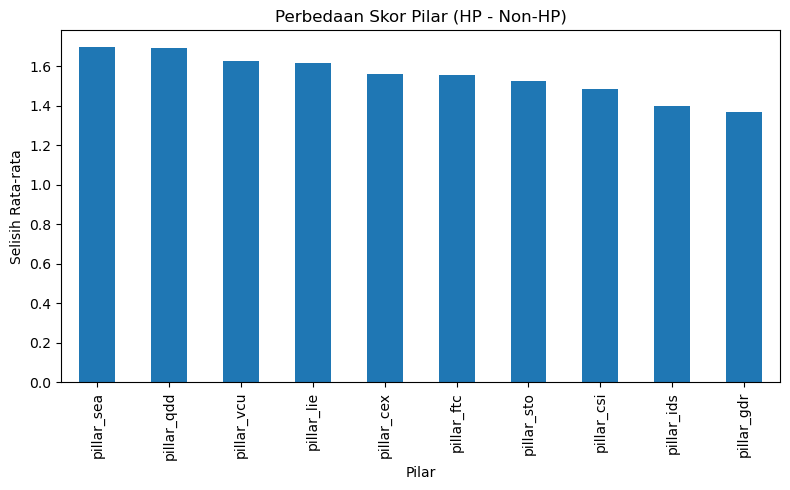

In [7]:
# Ambil semua kolom pilar
pillar_cols = [c for c in df.columns if c.startswith('pillar_')]

if pillar_cols:
    # Rata-rata pilar untuk HP vs non-HP
    comp_mean = df.groupby("is_hp")[pillar_cols].mean().T
    comp_mean.columns = ["Non-HP","HP"] if 0 in comp_mean.columns else comp_mean.columns
    # Jika kolom tidak berurutan, tangani manual
    if "HP" not in comp_mean.columns:
        comp_mean["HP"] = df[df["is_hp"]==1][pillar_cols].mean().values
        comp_mean["Non-HP"] = df[df["is_hp"]==0][pillar_cols].mean().values

    comp_mean["Delta_HP_minus_NonHP"] = comp_mean["HP"] - comp_mean["Non-HP"]
    comp_mean_sorted = comp_mean.sort_values("Delta_HP_minus_NonHP", ascending=False)

    print("\n== RATA-RATA SKOR PILAR: HP vs Non-HP ==")
    display(comp_mean_sorted)

    # Plot Delta
    plt.figure(figsize=(8,5))
    comp_mean_sorted["Delta_HP_minus_NonHP"].plot(kind="bar")
    plt.title("Perbedaan Skor Pilar (HP - Non-HP)")
    plt.ylabel("Selisih Rata-rata")
    plt.xlabel("Pilar")
    plt.tight_layout()
    plt.show()
else:
    print("Kolom pilar tidak ditemukan. Pastikan sudah dipivot atau prefix PILLAR_PREFIX benar.")


Grafik ini menunjukkan koefisien korelasi antara berbagai variabel dengan rating karyawan, yang menggambarkan hubungan antara setiap faktor dan high performance (rating tinggi). Grafik ini mengelompokkan korelasi menjadi dua kategori utama: korelasi positif dengan rating tinggi (HP) dan korelasi negatif dengan rating rendah (Non-HP).

- Korelasi Positif dengan Rating Tinggi (HP):

Pilar-pilar Kompetensi yang paling berpengaruh terhadap rating tinggi adalah pillar_sea (Social Empathy & Awareness), pillar_vcu (Value Creation for Users), dan pillar_ftc (Forward Thinking & Clarity). Hal ini menunjukkan bahwa kemampuan sosial, penciptaan nilai untuk pengguna, dan pemikiran maju merupakan karakteristik utama yang dimiliki oleh high performers.

Pilar-pilar lain seperti pillar_ids (Insight & Decision Sharpness), pillar_cex (Curiosity & Experimentation), dan pillar_csi (Commercial Savvy & Impact) juga memiliki korelasi positif dengan rating tinggi, yang menunjukkan bahwa kemampuan dalam membuat keputusan tajam, eksperimen kreatif, dan memahami dampak komersial menjadi kualitas yang berharga di kalangan high performers.

#### Insight
Korelasi Positif (HP):

- Social Empathy & Awareness (pillar_sea): Ini menunjukkan bahwa high performers tidak hanya memiliki kemampuan teknis, tetapi juga kemampuan untuk berempati dan bekerja dalam tim.
- Value Creation for Users (pillar_vcu) dan Forward Thinking & Clarity (pillar_ftc): Kemampuan untuk berpikir jangka panjang dan menciptakan nilai bagi pelanggan sangat penting untuk high performance.
- Keterampilan Pengambilan Keputusan (pillar_ids) dan Eksperimen (pillar_cex) menunjukkan bahwa high performers tidak hanya mengikuti aturan, tetapi juga memiliki kemampuan untuk berinovasi dan bertindak cepat dalam situasi yang dinamis.

# MBTI & DISC


== PROPORSI MBTI per kelompok HP ==


mbti,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INFTJ,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,UNKNOWN
is_hp,,,,,,,,,,,,,,,,,,
False,0.065220,0.073945,0.058894,0.058567,0.058676,0.054641,0.052896,0.047552,0.052241,0.061075,0.001527,0.051151,0.065220,0.054968,0.056713,0.055622,0.057476,0.073618
True,0.059024,0.081725,0.056754,0.060159,0.059024,0.049943,0.045403,0.049943,0.046538,0.062429,0.001135,0.052213,0.064699,0.057889,0.062429,0.056754,0.054484,0.079455


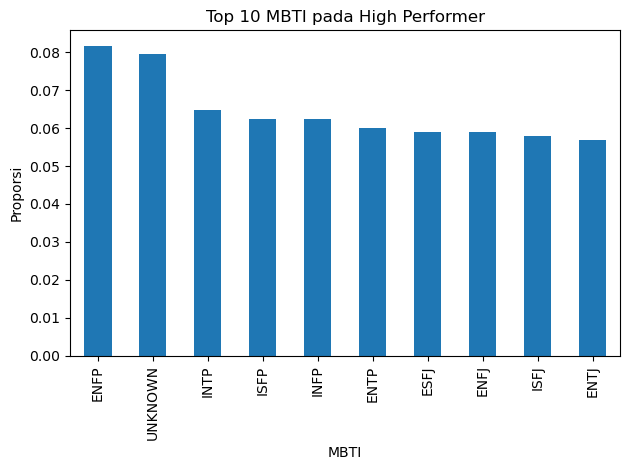


== PROPORSI DISC per kelompok HP ==


disc,CD,CI,CS,DC,DI,DS,IC,ID,IS,SC,SD,SI,UNKNOWN
is_hp,,,,,,,,,,,,,
False,0.084960,0.084851,0.078525,0.079834,0.075799,0.069582,0.074708,0.071218,0.062166,0.082561,0.067946,0.081252,0.086596
True,0.074915,0.098751,0.085131,0.094211,0.085131,0.070375,0.056754,0.070375,0.073780,0.071510,0.076050,0.073780,0.069240


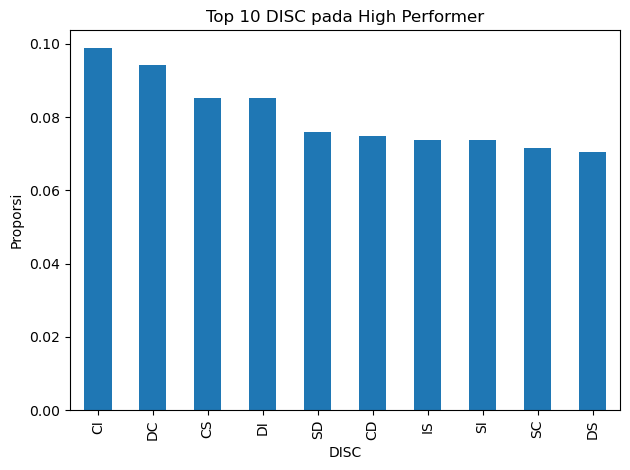

In [ ]:
# Pastikan flag HP bertipe boolean agar konsisten
df["is_hp"] = (df["rating"] == 5)

def top_categories_for_hp(df, cat_col, k=10):
    """Mengembalikan proporsi kategori per is_hp dan bar chart top-k HP."""
    # 1) Hitung frekuensi kategori per kelompok HP/Non-HP
    counts = (df.groupby(["is_hp", cat_col])["employee_id"]
                .size()
                .unstack(fill_value=0))  # index: is_hp, columns: kategori
    
    # 2) Normalisasi per baris → proporsi
    prop = counts.div(counts.sum(axis=1), axis=0)
    
    # 3) Tentukan label HP yang valid di index
    if True in prop.index:
        hp_key = True
    elif 1 in prop.index:
        hp_key = 1
    elif "1" in prop.index:
        hp_key = "1"
    else:
        # fallback: ambil baris pertama (supaya tidak crash)
        hp_key = prop.index[0]
    
    # 4) Ambil baris HP (Series) lalu urutkan
    top = prop.loc[hp_key].sort_values(ascending=False).head(k)
    
    # 5) Tampilkan tabel proporsi & plot top-k
    print(f"\n== PROPORSI {cat_col.upper()} per kelompok HP ==")
    display(prop)
    
    plt.figure()
    top.plot(kind="bar")
    plt.title(f"Top {k} {cat_col.upper()} pada High Performer")
    plt.ylabel("Proporsi")
    plt.xlabel(cat_col.upper())
    plt.tight_layout()
    plt.show()
    
    return prop, top

# Jalankan untuk MBTI & DISC
for cat in ["mbti", "disc"]:
    if cat in df.columns:
        _prop, _top = top_categories_for_hp(df, cat_col=cat, k=10)


## MBTI
Penjelasan Utama dari Grafik:

- ENFP (Extraverted, Intuitive, Feeling, Perceiving) adalah tipe MBTI yang paling dominan di kalangan high performers, dengan proporsi sekitar 0.08 atau 8%. Ini menunjukkan bahwa high performers cenderung memiliki sifat yang lebih terbuka, eksploratif, dan berorientasi pada orang lain.
- UNKNOWN juga memiliki proporsi yang cukup besar, yaitu sekitar 0.08, yang mungkin menunjukkan adanya data yang tidak lengkap atau kesalahan input dalam pengisian tipe MBTI karyawan di dataset ini.
- Tipe MBTI lainnya yang cukup sering muncul di kalangan high performers adalah INTP (Introverted, Intuitive, Thinking, Perceiving), ISFP (Introverted, Sensing, Feeling, Perceiving), INFP (Introverted, Intuitive, Feeling, Perceiving), dan ENTP (Extraverted, Intuitive, Thinking, Perceiving), dengan proporsi masing-masing sekitar 0.07.
- ESFJ, ENFJ, dan ISFJ adalah tipe MBTI lain yang juga ditemukan di kalangan high performers, meskipun dengan proporsi sedikit lebih rendah.

#### Insight
- Dominasi ENFP:
Tipe ENFP (Extraverted, Intuitive, Feeling, Perceiving) yang paling dominan menunjukkan bahwa high performers memiliki karakteristik yang terbuka terhadap pengalaman baru, komunikatif, dan berpikir idealis. Kemampuan untuk terhubung dengan orang lain dan berpikir kreatif adalah atribut yang membedakan mereka.

- Tipe MBTI lain yang dominan:
INTP, INFP, dan ENTP menunjukkan bahwa high performers juga memiliki kemampuan analitis, pemecahan masalah kreatif, dan kemampuan untuk berpikir secara strategis. Ini menunjukkan bahwa kombinasi antara kreativitas, keterbukaan terhadap ide baru, dan kemampuan analitis sangat penting untuk kinerja tinggi.

- Kemungkinan Data yang Tidak Lengkap:
UNKNOWN yang muncul cukup besar (sekitar 0.08) menunjukkan adanya data yang tidak lengkap pada kolom MBTI. Penting untuk memperbaiki atau membersihkan data untuk memastikan bahwa informasi MBTI lebih konsisten.

- Keseimbangan antara Ekstroversi dan Introversi:
Meskipun tipe ENFP dominan (ekstrovert), tipe introvert seperti INTP, INFP, dan ISFP juga cukup banyak ditemukan. Ini menunjukkan bahwa high performers dapat memiliki berbagai sifat kepribadian yang berbeda, baik ekstrovert maupun introvert, namun yang penting adalah kemampuan untuk berpikir strategis dan kreatif.

## DISC

Penjelasan Utama dari Grafik:

- CI (Conscientiousness + Influence) adalah tipe DISC yang paling dominan pada high performers, dengan proporsi sekitar 0.10 atau 10%. Tipe ini menunjukkan bahwa high performers cenderung memiliki perhatian tinggi terhadap detail, serta kemampuan untuk berkomunikasi dan mempengaruhi orang lain.
- DC (Dominance + Conscientiousness) dan CS (Conscientiousness + Steadiness) juga menunjukkan proporsi tinggi pada high performers, yang menunjukkan bahwa high performers juga memiliki kemampuan untuk mengambil keputusan yang cepat (dominance) serta pendekatan yang terorganisir dan stabil dalam bekerja.
- DI (Dominance + Influence), SD (Steadiness + Dominance), dan CD (Conscientiousness + Dominance) juga ditemukan di kalangan high performers, yang menunjukkan bahwa kepemimpinan yang kuat, kemampuan untuk beradaptasi dengan situasi, dan perhatian terhadap standar dan detail menjadi kombinasi yang penting untuk meningkatkan performa.
- SC, SI, dan DS muncul dengan proporsi lebih rendah, tetapi masih cukup sering ditemukan di kalangan high performers. Ini menunjukkan bahwa kombinasi stabilitas (Steadiness) dan kemampuan untuk beradaptasi secara fleksibel (Influence) tetap relevan meskipun tidak sekuat tipe-tipe sebelumnya.

#### Insight
- Dominasi CI (Conscientiousness + Influence):
High performers cenderung memiliki kombinasi perhatian terhadap detail (Conscientiousness) dan kemampuan untuk mempengaruhi orang lain (Influence). Ini menunjukkan bahwa high performers tidak hanya cerdas dalam pekerjaan mereka, tetapi juga mampu berkomunikasi dengan efektif dan memimpin orang lain.

- Kombinasi Dominance dan Conscientiousness:
DC (Dominance + Conscientiousness) dan CS (Conscientiousness + Steadiness) menunjukkan bahwa banyak high performers memiliki kemampuan kepemimpinan yang kuat, namun juga memiliki kepedulian terhadap kualitas dan hasil kerja yang stabil. Fokus pada hasil dan organisasi yang baik menjadi kualitas penting di kalangan mereka.

- Peran Adaptability dan Influence:
Tipe DISC seperti DI dan SD menunjukkan bahwa kemampuan untuk beradaptasi dengan cepat (Influence) dan kemampuan untuk mengambil keputusan dengan tegas (Dominance) juga sangat penting untuk high performers.

- Peran Steadiness (S):
Tipe yang lebih stabil seperti SC dan SI menunjukkan bahwa high performers juga perlu memiliki kemampuan untuk bekerja dengan stabilitas dan konsistensi sambil tetap fleksibel dalam pendekatan mereka.

# IQ, GTQ, dan TIKI

<Figure size 640x480 with 0 Axes>

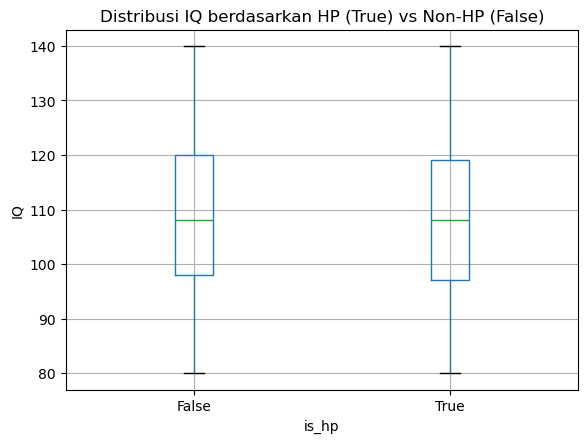

<Figure size 640x480 with 0 Axes>

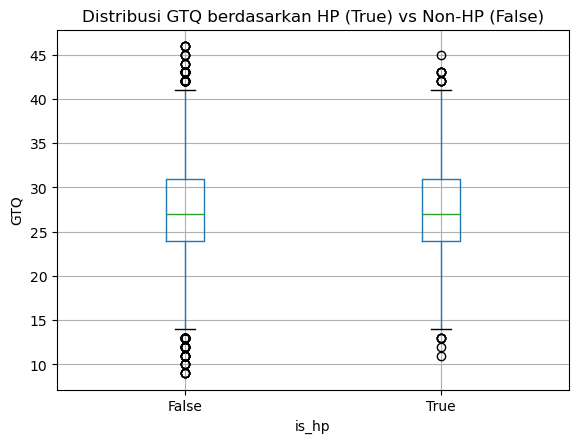

<Figure size 640x480 with 0 Axes>

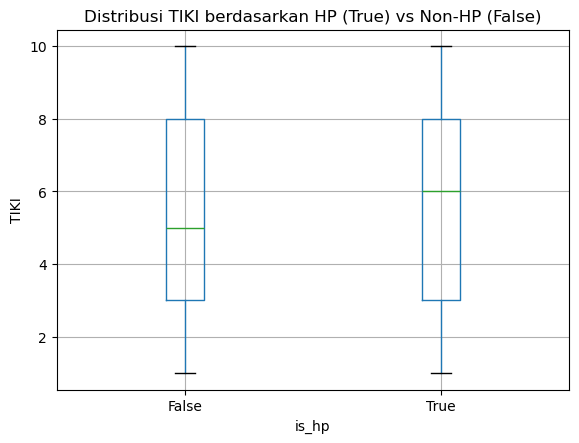

In [ ]:
for col in ["iq", "gtq", "tiki"]:
    if col in df.columns:
        plt.figure()
        df.boxplot(column=col, by="is_hp")
        plt.title(f"Distribusi {col.upper()} berdasarkan HP (True) vs Non-HP (False)")
        plt.suptitle("")
        plt.xlabel("is_hp")
        plt.ylabel(col.upper())
        plt.show()

#### Insight
Kesimpulan Umum dari Grafik:
- IQ, GTQ, dan TIKI tidak sepenuhnya membedakan high performers dari non-high performers.
- Faktor-faktor seperti kompetensi sosial, kepemimpinan, dan keterampilan praktis kemungkinan memiliki pengaruh lebih besar dalam penentuan kinerja tinggi daripada hanya sekedar kemampuan kognitif (IQ, GTQ, dan TIKI).
- Variasi yang lebih besar pada Non-HP menunjukkan bahwa ada lebih banyak faktor eksternal yang berpengaruh, seperti motivasi, lingkungan kerja, dan dukungan manajerial.

# Top Strengths


== LIFT RATIO STRENGTHS (HP vs Non-HP) ==


,lift
s_strategic,1.111946
s_learner,1.090981
s_relator,1.090741
s_achiever,0.954222
s_analytical,0.881057


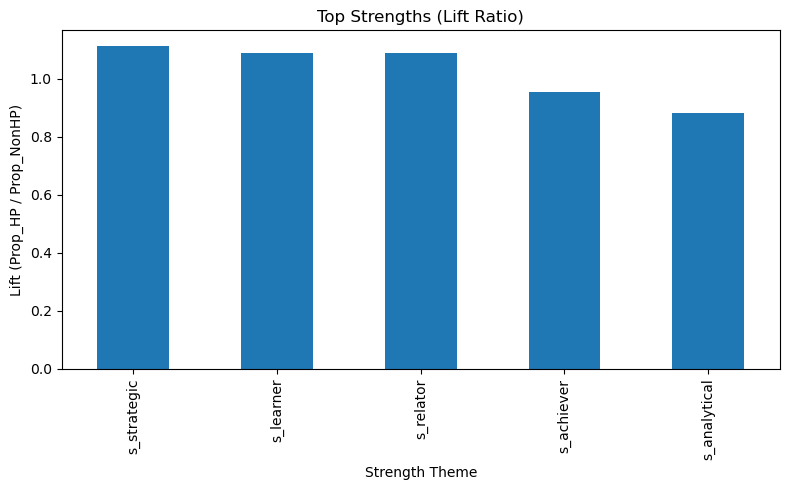

In [ ]:
# A) Jika sudah biner:
s_cols = [c for c in df.columns if c.startswith("s_")]

# Verifikasi kolom 'is_hp' dan 's_*'
if s_cols and 'is_hp' in df.columns:
    # Menghitung proporsi per tema berdasarkan HP dan Non-HP
    prop = df.groupby("is_hp")[s_cols].mean().T  # proporsi per tema untuk HP vs Non-HP
    
    # Pisahkan HP (True) dan Non-HP (False)
    # Mengonversi True menjadi 1 dan False menjadi 0
    prop_hp = prop.get(True)  # Proporsi pada HP (is_hp == True)
    prop_non_hp = prop.get(False)  # Proporsi pada Non-HP (is_hp == False)

    if prop_hp is not None and prop_non_hp is not None:
        # Menghindari pembagian dengan nol (mengganti 0 dengan NaN)
        prop_non_hp = prop_non_hp.replace(0, np.nan)

        # Lift Ratio: Proporsi HP / Proporsi Non-HP
        lift = (prop_hp / prop_non_hp).sort_values(ascending=False)
        lift = lift.replace([np.inf, -np.inf], np.nan).dropna()

        # Menampilkan hasil Lift Ratio
        print("\n== LIFT RATIO STRENGTHS (HP vs Non-HP) ==")
        display(lift.to_frame("lift").head(15))

        # Visualisasi Lift Ratio dengan bar chart
        plt.figure(figsize=(8,5))
        lift.head(15).plot(kind="bar")
        plt.title("Top Strengths (Lift Ratio)")
        plt.ylabel("Lift (Prop_HP / Prop_NonHP)")
        plt.xlabel("Strength Theme")
        plt.tight_layout()
        plt.show()
    else:
        print("Tidak ditemukan data untuk HP (is_hp == True) atau Non-HP (is_hp == False) dalam dataset.")

else:
    print("Data Strengths tidak ditemukan (tidak ada kolom s_* atau 'is_hp').")


#### Insight

- Strategic dan Learner sebagai Pilar Kunci:

Strength Themes seperti Strategic dan Learner muncul sebagai kekuatan utama high performers. Ini menunjukkan bahwa mereka memiliki kemampuan untuk berpikir jangka panjang dan selalu belajar, yang memungkinkan mereka untuk tetap relevan dan adaptif dalam lingkungan yang berubah.

Ini memberikan wawasan bahwa perusahaan dapat lebih memfokuskan pelatihan dan pengembangan pada kemampuan berpikir strategis dan pembelajaran berkelanjutan untuk meningkatkan high performance.

- Relator sebagai Faktor Sosial yang Kuat:

Kemampuan untuk berhubungan dengan orang lain (Relator) adalah kekuatan penting lainnya yang membedakan high performers. Ini menunjukkan bahwa kerja tim dan keterampilan interpersonal memiliki peran yang sangat penting dalam kinerja tinggi.

Pengembangan keterampilan komunikasi dan membangun hubungan yang solid dapat menjadi area fokus dalam program pengembangan karyawan.

- Achiever dan Analytical sebagai Keterampilan Pelengkap:

Achiever dan Analytical adalah kekuatan yang membantu high performers untuk mencapai tujuan dengan cara yang sistematis dan terukur. Meskipun Lift Ratio mereka sedikit lebih rendah, keduanya masih sangat penting untuk keberhasilan jangka panjang dalam pekerjaan.

Fokus pada pencapaian dan kemampuan analitis menjadi pelengkap penting dalam meningkatkan kinerja, terutama dalam pengelolaan proyek dan pemecahan masalah.

# Proporsi Rating Berdasarkan Grade, Years of Service dan Pendidikan

In [ ]:
# Grade vs Rating
if "grade_name" in df.columns:
    grade_rating = df.pivot_table(index="grade_name", columns="rating", values="employee_id", aggfunc="count", fill_value=0)
    grade_rating = grade_rating.div(grade_rating.sum(axis=1), axis=0)
    print("\n== PROPORSI RATING PER GRADE ==")
    display(grade_rating)

# Pendidikan vs Rating
if "education_level" in df.columns:
    edu_rating = df.pivot_table(index="education_level", columns="rating", values="employee_id", aggfunc="count", fill_value=0)
    edu_rating = edu_rating.div(edu_rating.sum(axis=1), axis=0)
    print("\n== PROPORSI RATING PER PENDIDIKAN ==")
    display(edu_rating)

# Years of service vs Rating (ringkas)
if "years_of_service" in df.columns:
    # Bucket masa kerja agar mudah dibaca
    bins = [-np.inf, 1, 3, 5, 10, np.inf]
    labels = ["<=1y","1-3y","3-5y","5-10y",">10y"]
    df["yos_bin"] = pd.cut(df["years_of_service"], bins=bins, labels=labels)
    yos_tab = df.pivot_table(index="yos_bin", columns="rating", values="employee_id", aggfunc="count", fill_value=0)
    yos_tab = yos_tab.div(yos_tab.sum(axis=1), axis=0)
    print("\n== PROPORSI RATING PER MASA KERJA ==")
    display(yos_tab)


== PROPORSI RATING PER GRADE ==


rating,0.0,1.0,2.0,3.0,4.0,5.0,6.0,99.0
grade_name,,,,,,,,
III,0.001775,0.064497,0.151479,0.441420,0.248225,0.091420,0.000592,0.000592
IV,0.001508,0.071795,0.164706,0.433786,0.237406,0.088688,0.001508,0.000603
V,0.001192,0.064382,0.154993,0.452161,0.241729,0.082861,0.001788,0.000894



== PROPORSI RATING PER PENDIDIKAN ==


rating,0.0,1.0,2.0,3.0,4.0,5.0,6.0,99.0
education_level,,,,,,,,
D3,0.002703,0.072201,0.152124,0.437838,0.259073,0.073745,0.001158,0.001158
S1,0.001988,0.069185,0.159841,0.434195,0.242147,0.091054,0.001193,0.000398
S2,0.000760,0.066540,0.153612,0.448289,0.230038,0.098479,0.001901,0.000380
SMA,0.000432,0.058747,0.163283,0.450108,0.238445,0.087257,0.000864,0.000864



== PROPORSI RATING PER MASA KERJA ==


C:\Users\fajar\AppData\Local\Temp\ipykernel_13960\727674834.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  yos_tab = df.pivot_table(index="yos_bin", columns="rating", values="employee_id", aggfunc="count", fill_value=0)


rating,0.0,1.0,2.0,3.0,4.0,5.0,6.0,99.0
yos_bin,,,,,,,,
<=1y,0.001550,0.060465,0.150388,0.514729,0.201550,0.071318,0.000000,0.000000
1-3y,0.001996,0.060679,0.156088,0.457086,0.239521,0.083433,0.001198,0.000000
3-5y,0.001141,0.072468,0.158060,0.431669,0.245078,0.088730,0.001712,0.001141
5-10y,0.001497,0.066168,0.159880,0.427844,0.249401,0.093114,0.001198,0.000898
>10y,0.000000,0.109091,0.036364,0.509091,0.272727,0.072727,0.000000,0.000000


#### Insight Rating Per Grade
- Grade III dan Grade IV cenderung lebih dominan pada rating 3, menunjukkan bahwa kinerja rata-rata lebih banyak pada grade-grup ini.
- Grade V menunjukkan potensi untuk high performers yang lebih besar. Strategi pengembangan karier dapat difokuskan pada peningkatan karyawan di Grade III dan Grade IV untuk mencapai performa yang lebih tinggi.

#### Insight Rating Per Pendidikan
- Pendidikan D3 menunjukkan kinerja rata-rata yang lebih dominan, sedangkan S1 dan S2 menunjukkan potensi lebih besar untuk menjadi high performers (rating 5).
- Pendidikan tinggi (S1 dan S2) dapat berhubungan dengan kemampuan teknis dan kepemimpinan yang lebih baik, yang mendukung kinerja yang lebih tinggi.

#### Insight Rating Per Masa Kerja
- Masa kerja 1-5 tahun menunjukkan distribusi yang lebih baik, dengan rating 5 mulai lebih banyak muncul.
- Karyawan dengan masa kerja lebih lama (5-10 tahun) dan lebih dari 10 tahun cenderung berada pada rating 3 dan 4, yang menunjukkan stabilitas kinerja tetapi kurang variasi untuk rating tinggi.
- Masa kerja lebih panjang mungkin berkorelasi dengan keterikatan yang lebih kuat pada organisasi, tetapi karyawan baru dengan masa kerja pendek menunjukkan lebih banyak potensi untuk berkembang menjadi high performers.

# Z-Score Success Rate


== CONTOH 10 BARIS SUCCESS SCORE V1 ==


,employee_id,year,rating,success_score_v1
0,EMP100889,2025,3.0,-0.589597
1,EMP100792,2025,3.0,0.060055
2,EMP101730,2025,3.0,-0.076481
3,EMP100159,2025,3.0,0.211062
4,EMP100337,2025,3.0,-0.438228
5,EMP100647,2025,3.0,-0.213345
6,EMP101867,2025,3.0,-0.140947
7,EMP100592,2025,3.0,-0.145728
8,EMP100938,2025,3.0,-0.001104
9,EMP101491,2025,3.0,-0.335598



== VALIDASI CEPAT SUCCESS SCORE V1 (HP vs Non-HP) ==


,mean,median,std,count
is_hp,,,,
False,-0.020624,-0.044949,0.455063,9169
True,0.214645,0.161095,0.465672,881


<Figure size 640x480 with 0 Axes>

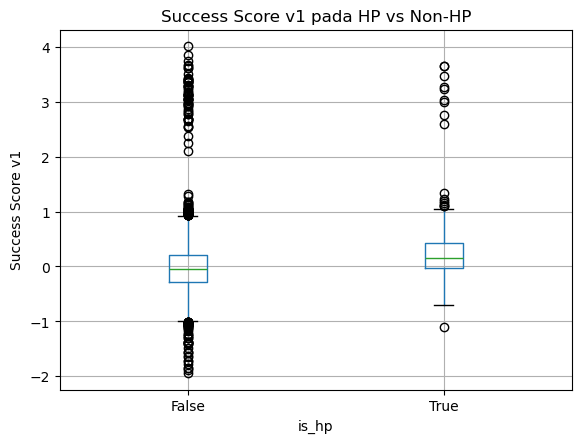

In [ ]:
# Skor komposit: Cognitive, Leadership/Strategic (dari pilar), Strengths, Experience

# 9.1 Cognitive = Z-score dari iq + gtq
from scipy.stats import zscore

df_feat = df.copy()

def safe_z(series):
    s = pd.to_numeric(series, errors="coerce")
    if s.std(ddof=0) == 0 or s.isna().all():
        return pd.Series([0]*len(s), index=s.index)
    return pd.Series(zscore(s.fillna(s.median())), index=s.index)

cog_cols = [c for c in ["iq","gtq"] if c in df_feat.columns]
if cog_cols:
    zsum = sum(safe_z(df_feat[c]) for c in cog_cols)
    df_feat["score_cognitive"] = zsum / max(1,len(cog_cols))
else:
    df_feat["score_cognitive"] = 0.0

# 9.2 Leadership/Strategic dari pilar
candidate_pillars = [p for p in ["pillar_sea","pillar_qdd","pillar_vcu","pillar_lie"] if p in df_feat.columns]
if candidate_pillars:
    df_feat["score_leadership"] = df_feat[candidate_pillars].mean(axis=1)
    # normalisasi ke z agar skala sebanding
    df_feat["score_leadership"] = safe_z(df_feat["score_leadership"])
else:
    df_feat["score_leadership"] = 0.0

# 9.3 Strengths: jumlah tema yang “unggul” (berdasar lift > 1)
# Jika kita punya s_*:
s_cols = [c for c in df_feat.columns if c.startswith("s_")]
if s_cols:
    # gunakan rata-rata sebagai skor; bisa disesuaikan untuk top-lift saja
    df_feat["score_strengths"] = df_feat[s_cols].mean(axis=1)
    df_feat["score_strengths"] = safe_z(df_feat["score_strengths"])
else:
    df_feat["score_strengths"] = 0.0

# 9.4 Experience: fungsi masa kerja
if "years_of_service" in df_feat.columns:
    yos = df_feat["years_of_service"].clip(lower=0)
    # Skor pengalaman sederhana: semakin dekat ke 4.5 tahun semakin tinggi
    df_feat["score_experience"] = -((yos - 4.5)**2) + (4.5**2)  # puncak di 4.5
    df_feat["score_experience"] = safe_z(df_feat["score_experience"])
else:
    df_feat["score_experience"] = 0.0

# 9.5 Bobot awal berdasarkan kekuatan sinyal
w = {
    "score_cognitive": 0.35,
    "score_leadership": 0.30,
    "score_strengths": 0.20,
    "score_experience": 0.15
}

df_feat["success_score_v1"] = (w["score_cognitive"]  * df_feat["score_cognitive"] +
                               w["score_leadership"] * df_feat["score_leadership"] +
                               w["score_strengths"]  * df_feat["score_strengths"] +
                               w["score_experience"] * df_feat["score_experience"])

print("\n== CONTOH 10 BARIS SUCCESS SCORE V1 ==")
display(df_feat[["employee_id","year","rating","success_score_v1"]].head(10))

# 9.6 Validasi cepat
val_tab = df_feat.groupby("is_hp")["success_score_v1"].agg(["mean","median","std","count"])
print("\n== VALIDASI CEPAT SUCCESS SCORE V1 (HP vs Non-HP) ==")
display(val_tab)

# Visual perbandingan success score
plt.figure()
df_feat.boxplot(column="success_score_v1", by="is_hp")
plt.title("Success Score v1 pada HP vs Non-HP")
plt.suptitle("")
plt.xlabel("is_hp")
plt.ylabel("Success Score v1")
plt.show()

#### Insight
- Median Success Score v1 untuk HP (True) terletak pada angka 0, sedangkan Non-HP (False) memiliki median lebih rendah yang menunjukkan bahwa high performers memiliki nilai lebih konsisten dan lebih tinggi dalam Success Score dibandingkan dengan non-high performers.
- Variabilitas atau rentang interquartile (IQR) pada Non-HP lebih besar, dengan beberapa outliers yang lebih rendah dan lebih tinggi, yang menunjukkan adanya karyawan dengan performa sangat rendah dan beberapa karyawan dengan performa tinggi yang mungkin tidak tercermin pada rating mereka.
- HP memiliki rentang IQR yang lebih sempit, menunjukkan bahwa mereka lebih konsisten dalam performa mereka.
- Outliers pada Non-HP di sisi kiri menunjukkan ada beberapa karyawan dengan kinerja sangat rendah, sedangkan pada sisi kanan menunjukkan beberapa karyawan yang menunjukkan potensi yang lebih tinggi namun tidak tercermin dalam rating mereka.

# Visualisasi High Performers vs Non-High Performers

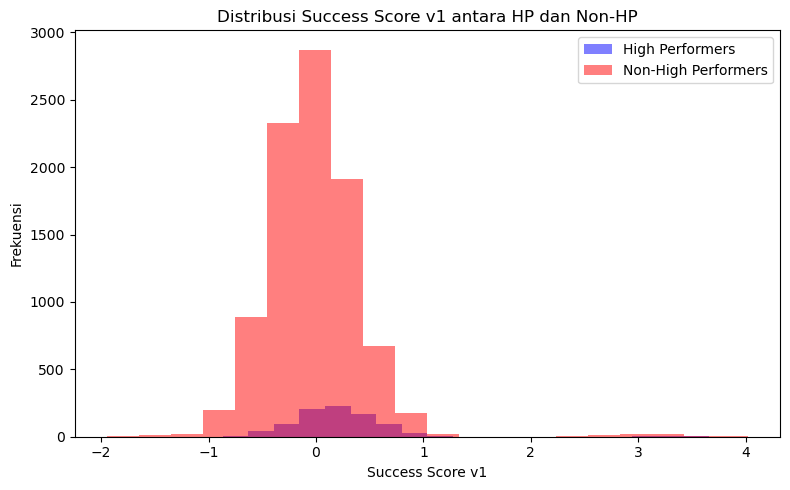

In [ ]:
plt.figure(figsize=(8,5))
df_feat[df_feat['is_hp'] == True]['success_score_v1'].plot(kind='hist', alpha=0.5, bins=20, label='High Performers', color='blue')
df_feat[df_feat['is_hp'] == False]['success_score_v1'].plot(kind='hist', alpha=0.5, bins=20, label='Non-High Performers', color='red')
plt.title('Distribusi Success Score v1 antara HP dan Non-HP')
plt.xlabel('Success Score v1')
plt.ylabel('Frekuensi')
plt.legend()
plt.tight_layout()
plt.show()

#### Insight

- Distribusi untuk High Performers:

1. Distribusi HP terpusat pada Success Score yang lebih tinggi (sekitar 0 hingga 2).

2. Ada beberapa outliers positif (karyawan dengan skor lebih tinggi dari 2), yang menunjukkan adanya karyawan dengan performa luar biasa dalam kategori HP.

- Distribusi untuk Non-HP:

1. Distribusi Non-HP menunjukkan dominasi Success Score yang lebih rendah (sekitar -2 hingga 0).

2. Sebagian besar non-high performers memiliki skor rata-rata atau rendah, dengan lebih banyak outliers negatif (karyawan dengan kinerja sangat rendah).

- Perbandingan Frekuensi:

1. Non-HP memiliki frekuensi yang jauh lebih tinggi di bagian kiri grafik, yang menunjukkan bahwa sebagian besar karyawan dengan rating rendah memiliki Success Score yang lebih rendah.

2. HP lebih terfokus pada skor lebih tinggi, dengan lebih sedikit karyawan yang memiliki skor sangat rendah, menunjukkan konsistensi lebih tinggi dalam performa mereka.

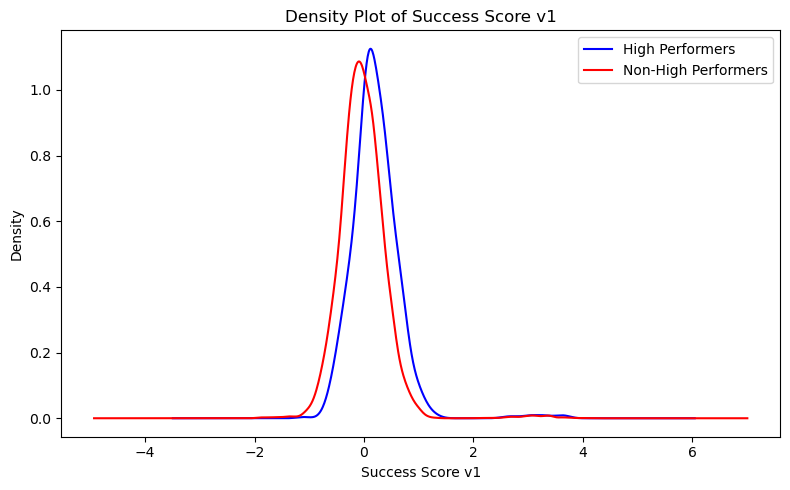

In [ ]:
plt.figure(figsize=(8,5))
df_feat[df_feat['is_hp'] == True]['success_score_v1'].plot(kind='kde', label='High Performers', color='blue')
df_feat[df_feat['is_hp'] == False]['success_score_v1'].plot(kind='kde', label='Non-High Performers', color='red')
plt.title('Density Plot of Success Score v1')
plt.xlabel('Success Score v1')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

#### Insight

- Distribusi untuk HP (biru):

1. High performers memiliki distribusi puncak yang tajam di sekitar Success Score v1 > 0, yang menunjukkan bahwa majoritas HP memiliki skor yang lebih tinggi dan lebih terkonsentrasi di sekitar nilai positif.

2. Ada juga kelompok outliers positif di sisi kanan yang menunjukkan adanya karyawan dengan skor Success Score yang sangat tinggi.

- Distribusi untuk Non-HP (merah):

1. Non-high performers memiliki distribusi yang lebih lebar dan terpusat pada Success Score v1 < 0, dengan kepadatan tinggi di sekitar 0 dan lebih banyak outliers negatif di sisi kiri.

2. Beberapa non-high performers memiliki skor negatif, yang menunjukkan performa yang lebih rendah dibandingkan dengan kelompok HP.

- Perbandingan antara HP dan Non-HP:

1. High performers memiliki distribusi kepadatan yang lebih sempit dan terkonsentrasi di sekitar Success Score yang lebih tinggi, menunjukkan konsistensi yang lebih baik dalam performa mereka.

2. Non-HP memiliki distribusi yang lebih rata, dengan skor lebih bervariasi dan lebih banyak outliers negatif, yang mencerminkan variabilitas performa yang lebih tinggi di antara mereka.

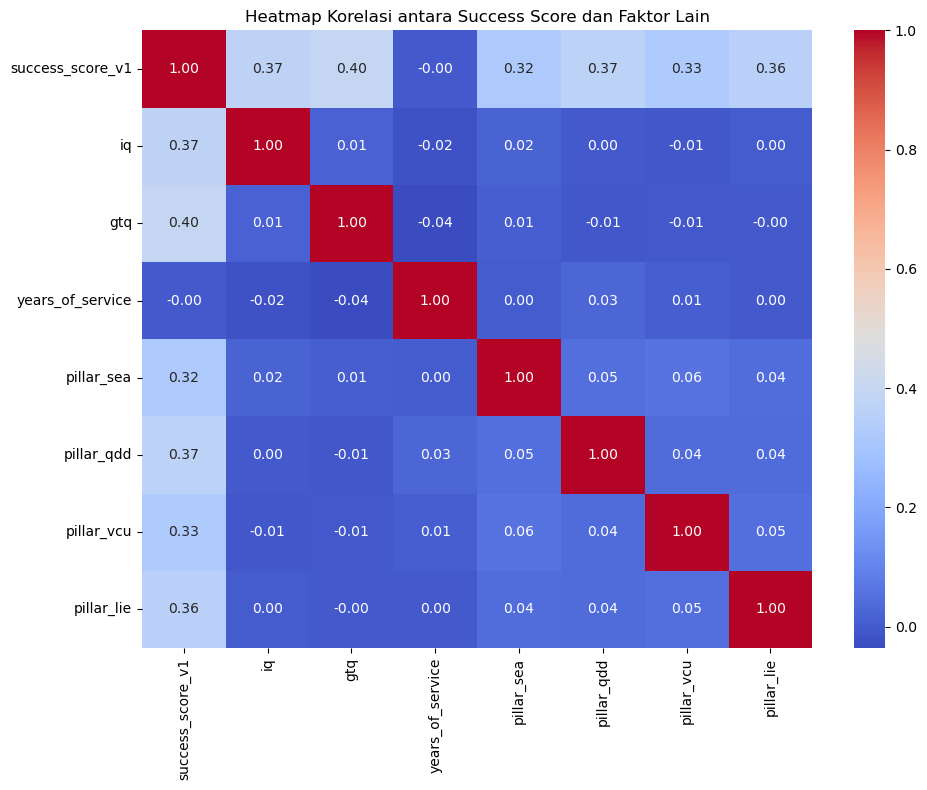

In [ ]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df_feat[['success_score_v1', 'iq', 'gtq', 'years_of_service', 'pillar_sea', 'pillar_qdd', 'pillar_vcu', 'pillar_lie']].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antara Success Score dan Faktor Lain')
plt.tight_layout()
plt.show()

#### Insight
- Success Score v1 memiliki korelasi positif terkuat dengan GTQ (0.40), menunjukkan bahwa kemampuan berpikir umum berhubungan dengan kinerja tinggi.
- Success Score v1 juga memiliki korelasi positif yang cukup signifikan dengan beberapa pillar kompetensi, terutama dengan pillar_sea (Social Empathy & Awareness) dan pillar_vcu (Value Creation for Users), dengan koefisien korelasi masing-masing 0.32 dan 0.33.
- IQ memiliki korelasi positif yang moderat dengan Success Score v1 (0.37), menunjukkan bahwa kemampuan kognitif memang mempengaruhi kinerja.
- Masa Kerja (years_of_service) memiliki korelasi sangat lemah dengan Success Score v1 (-0.00), yang menunjukkan bahwa pengalaman kerja tidak terlalu berpengaruh terhadap kinerja tinggi dalam kasus ini.
- Pilar QDD (Quality Delivery Discipline) dan pillar_lie (Lead, Inspire, Empower) juga menunjukkan korelasi positif yang moderat dengan Success Score v1, meskipun tidak sekuat beberapa pilar lainnya.